Look at time-averaged fluxes through Boundary Pass
To start, use ncra (on Salish) to average the files over 40 days

In [57]:
from __future__ import division, print_function

%matplotlib inline

import matplotlib.cm as cmx
import matplotlib.colors as colors
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import netCDF4 as NC
import numpy as np

from salishsea_tools import viz_tools

In [67]:
U1 = NC.Dataset('/ocean/sallen/allen/research/MEOPAR/myResults/NEMO36_Tides/weaklog/SalishSea_40davg_20030421_20030510_grid_U.nc','r')
T1 = NC.Dataset('/ocean/sallen/allen/research/MEOPAR/myResults/NEMO36_Tides/weaklog/SalishSea_40davg_20030421_20030510_grid_T.nc','r')

In [68]:
print (U1.variables['vozocrtx'].shape)
uvel = U1.variables['vozocrtx'][0]
sal = T1.variables['vosaline'][0]

(1, 40, 898, 398)


In [18]:
# read the bathymetry that we specify and send into NEMO
sb_filepath = '../../NEMO-forcing/grid/bathy_meter_SalishSea2.nc'
spec_bathy = NC.Dataset(sb_filepath, 'r')
spec_depth = spec_bathy.variables['Bathymetry'][:]

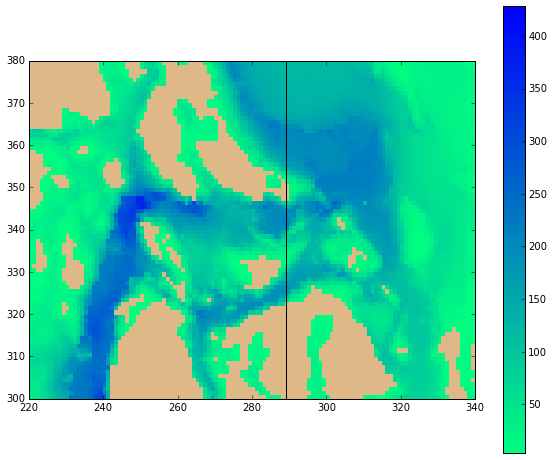

In [32]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
viz_tools.set_aspect(ax)
cmap = plt.get_cmap('winter_r')
cmap.set_bad('burlywood')
mesh = ax.pcolormesh(spec_depth, cmap=cmap)
fig.colorbar(mesh)
plt.axis((220, 340, 300, 380))
jwanted = 289; imin = 300; imax = 380
ax.plot((jwanted,jwanted),(imin,imax), 'k')

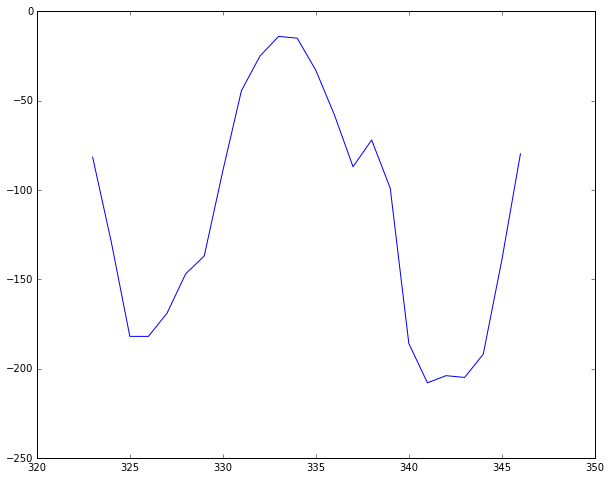

In [36]:
imin = 320; imax = 350
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
ax.plot(np.arange(imin,imax), -spec_depth[imin:imax,jwanted])

In [37]:
# read the bathymetry that NEMO puts out after one time step
nc_filepath = '../../NEMO-forcing/grid/grid_bathy.nc'
bathy = NC.Dataset(nc_filepath, 'r')
depth = bathy.variables['grid_bathy'][:]
dep_d = bathy.variables['deptht'][:]
lon_d = bathy.variables['nav_lon'][:]
lat_d = bathy.variables['nav_lat'][:]
print (depth.shape)

(40, 898, 398)


In [39]:
# depths are at the centre of the grid cells, find the bottom(floor) and 
# top(ceil) of the cells
floor = np.empty_like(depth[:,imin:imax,jwanted])
ceil = np.empty_like(depth[:,imin:imax,jwanted])
ceil[0] = 0.
floor[0] = 2*depth[0,imin:imax,jwanted]
for k in range(1,40):
    ceil[k] = floor[k-1]
    floor[k] = 2*depth[k,imin:imax,jwanted] -floor[k-1]
# find the actual bottom depth
bottom = np.max(floor, axis=0)
print (bottom.shape, floor.shape)

(30,) (40, 30)


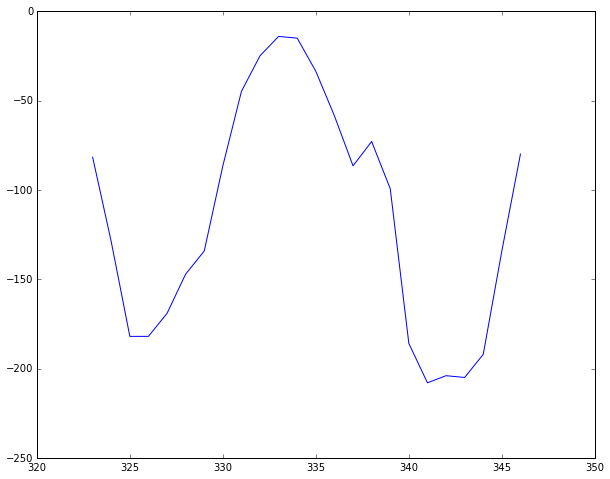

In [41]:
imin = 320; imax = 350
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
ax.plot(np.arange(imin,imax), - bottom[:])

(-250.0, 0)

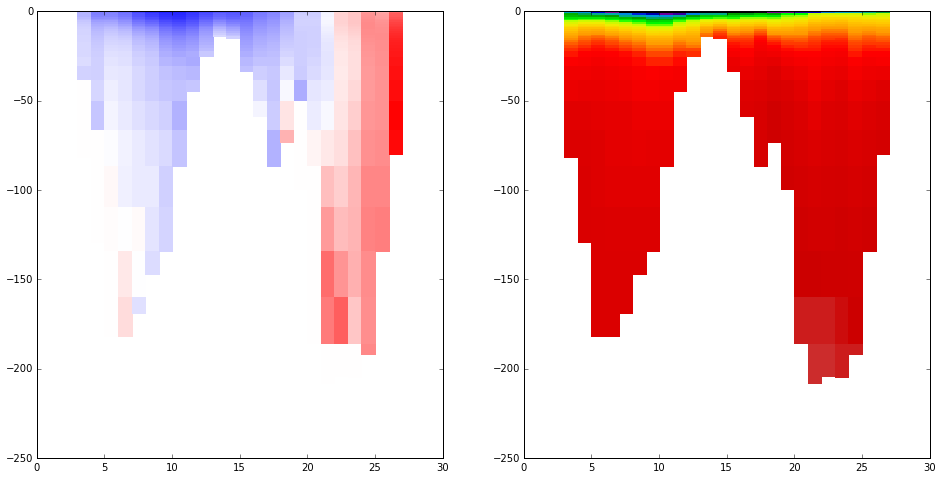

In [74]:
# plot the velocity
maxdepth = 250.
fig, ax = plt.subplots(1, 2, figsize=(16,8))
cmap = plt.get_cmap('bwr') 
cNorm  = colors.Normalize(vmin=-0.5, vmax=0.5)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cmap)

for i in range(imax-imin):
    for k in range(40):
        rect = mpatches.Rectangle([i, -floor[k,i]], 1., floor[k,i]-ceil[k,i], 
                                  color=scalarMap.to_rgba(uvel[k,i+imin,jwanted]))
        ax[0].add_patch(rect)

ax[0].set_xlim((0,imax-imin))
ax[0].set_ylim((-maxdepth,0))

cmap = plt.get_cmap('spectral') 
cNorm  = colors.Normalize(vmin=26, vmax=30.5)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cmap)

for i in range(imax-imin):
    for k in range(40):
        rect = mpatches.Rectangle([i, -floor[k,i]], 1., floor[k,i]-ceil[k,i], 
                                  color=scalarMap.to_rgba(sal[k,i+imin,jwanted]))
        ax[1].add_patch(rect)

ax[1].set_xlim((0,imax-imin))
ax[1].set_ylim((-maxdepth,0))
